# Explorer un corpus

## Imports

In [2]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

## Compter le nombre de documents dans le corpus

In [3]:
path = "../data/camille_Crise_economique/"
files = sorted(os.listdir(path))
len(files)

500

## Explorer les noms de fichier

Nous allons manipuler ici les chaines de caractères.

Il s'agit de la classe `str` en Python.

Pour en savoir plus : https://openclassrooms.com/fr/courses/235344-apprenez-a-programmer-en-python/231888-creez-votre-premier-objet-les-chaines-de-caracteres

In [4]:
chaine = 'KB_JB838_1930-01-10_01-00001'
type(chaine)

str

In [5]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['KB', 'JB838', '1930-01-10', '01-00001']

In [6]:
# Accéder à la date
date = chaine_split[2]

# Accéder à l'année
date_split = date.split('-')
year = date_split[0]

In [7]:
# Manipuler les str pour convertir une année en décennie
year[:3]

'193'

In [8]:
year[-1]

'0'

In [9]:
year[:3] + '0s'

'1930s'

## Quelques statistiques

In [10]:
all_years = [str(year) for year in range(1929, 1940)]

In [11]:
count_decade = defaultdict(int)
count_year = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
        count_year[year]+=1
    else:
        print(f"Anomalous file: {f}")

In [12]:
print(f"Il y a {count_newspapers['JB838']} exemplaires du journal Le Soir et {count_newspapers['JB427']} exemplaires de La Libre Belgique")

Il y a 500 exemplaires du journal Le Soir et 0 exemplaires de La Libre Belgique


In [13]:
print(f"Il y a {count_decade['1930s']} fichiers pour la décennie 1930s")

Il y a 499 fichiers pour la décennie 1930s


In [14]:
missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Années manquantes: 


## Visualisation du nombre de journaux par an et par mois

Ces visualisations sont obtenues avec la librairie Matplotlib.

Pour en savoir plus : https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/4740942-maitrisez-les-possibilites-offertes-par-matplotlib.

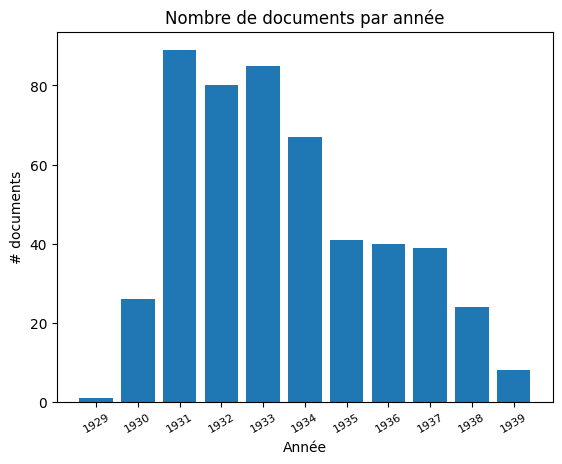

In [15]:
index = np.arange(len(count_year))
plt.bar(index, count_year.values())
plt.xlabel('Année')
plt.ylabel('# documents')
plt.xticks(index, count_year.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par année')
plt.show()

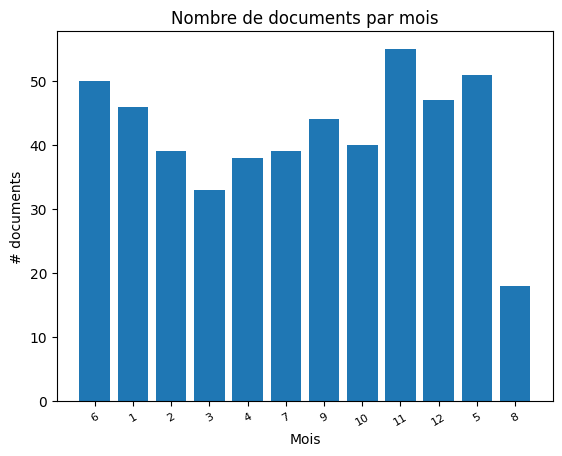

In [16]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

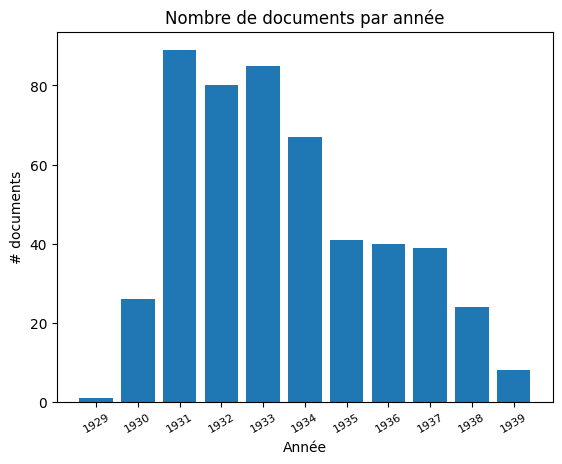

In [17]:
index = np.arange(len(count_year))
plt.bar(index, count_year.values())
plt.xlabel('Année')
plt.ylabel('# documents')
plt.xticks(index, count_year.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par année')
plt.show()